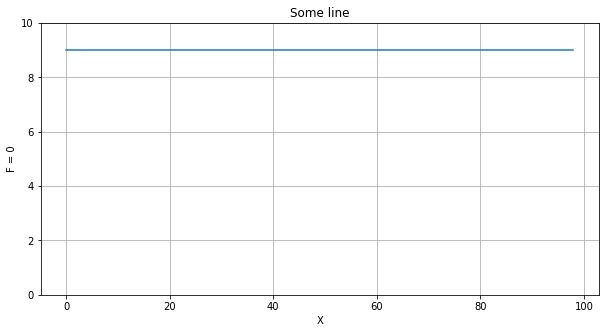

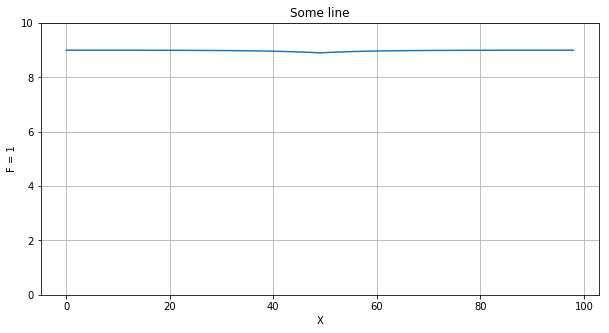

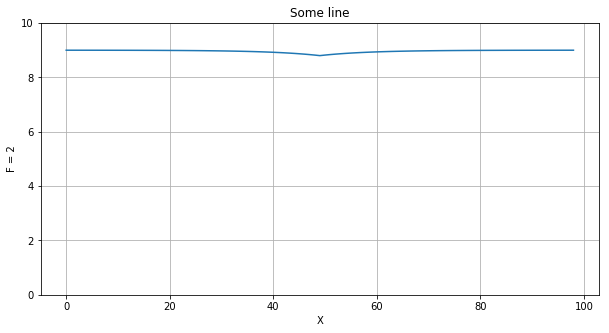

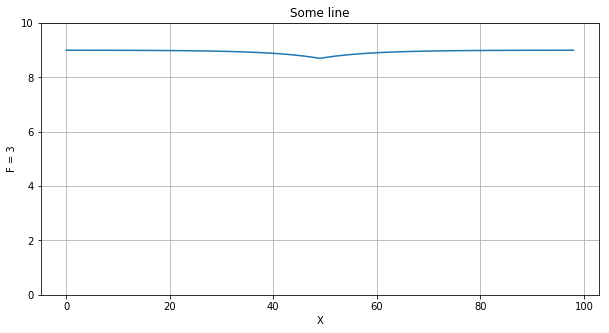

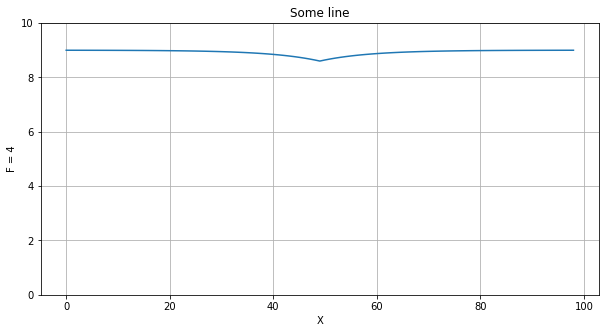

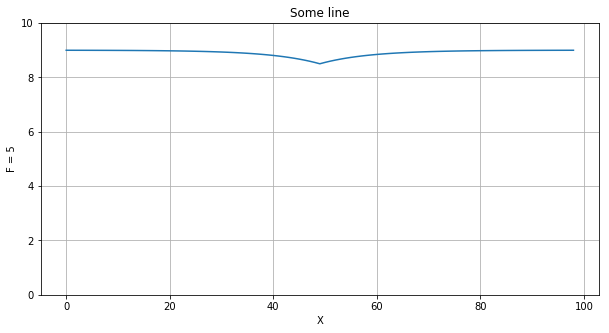

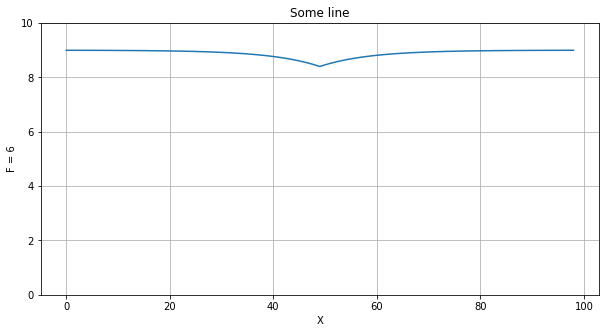

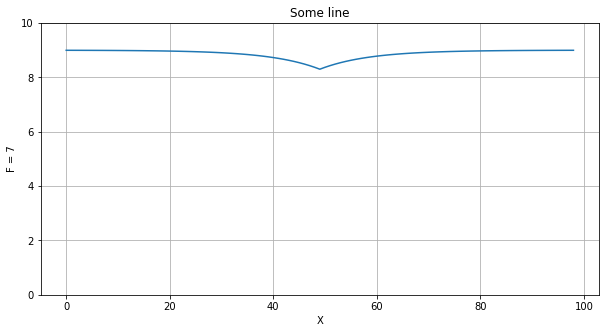

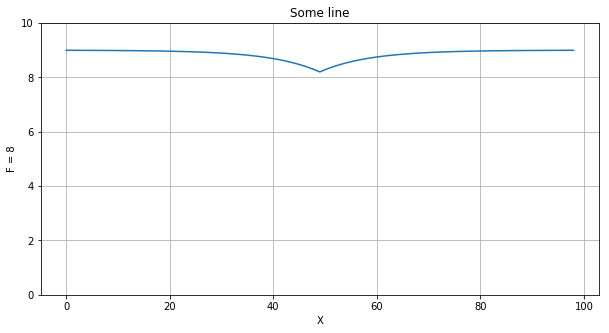

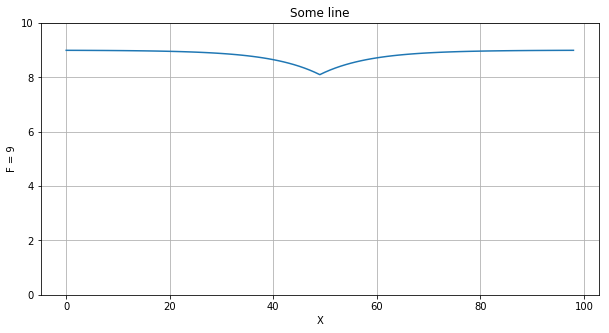

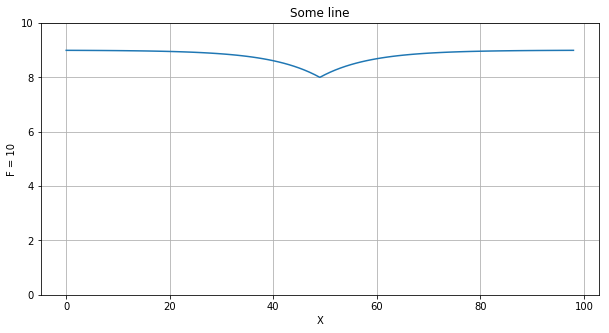

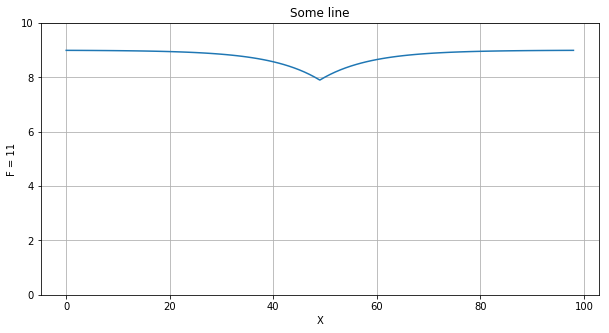

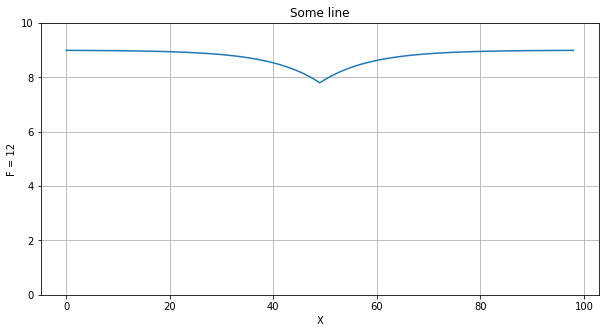

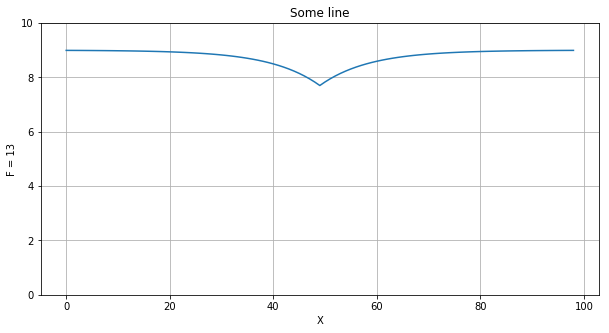

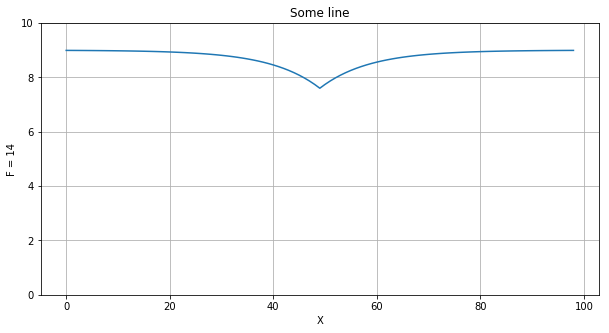

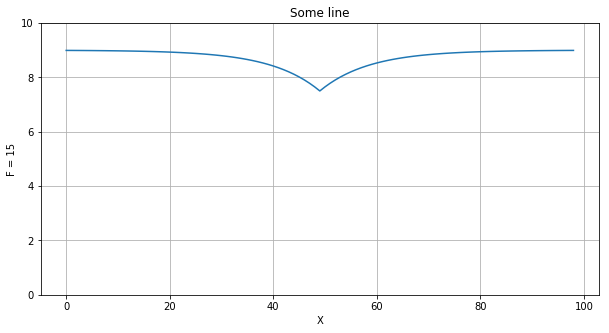

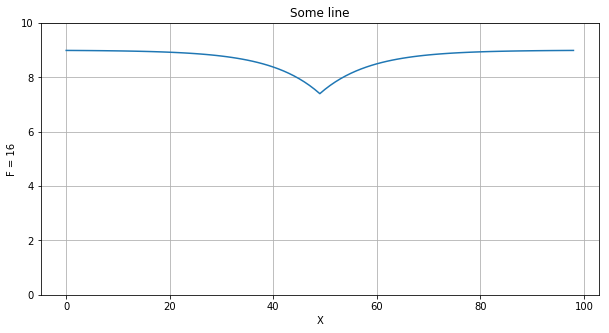

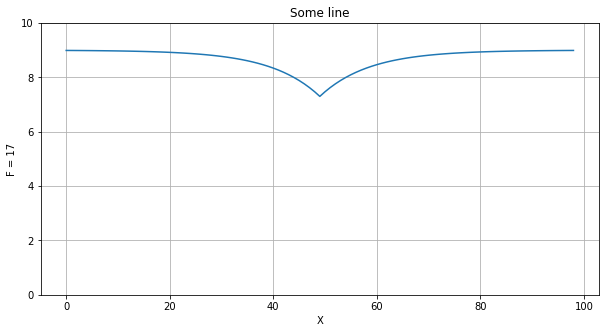

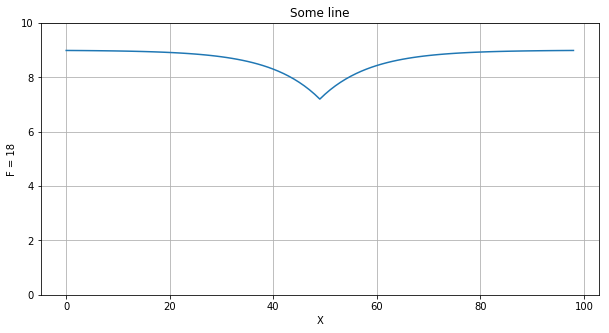

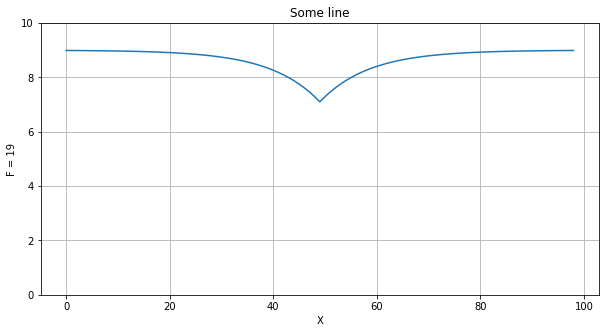

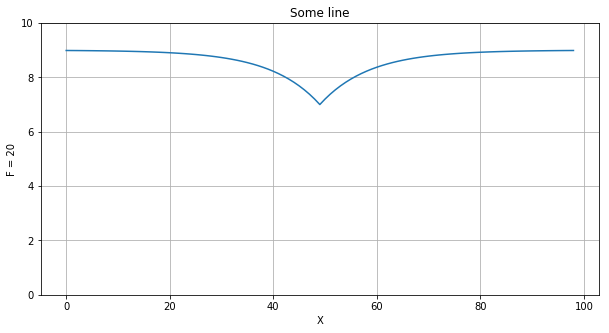

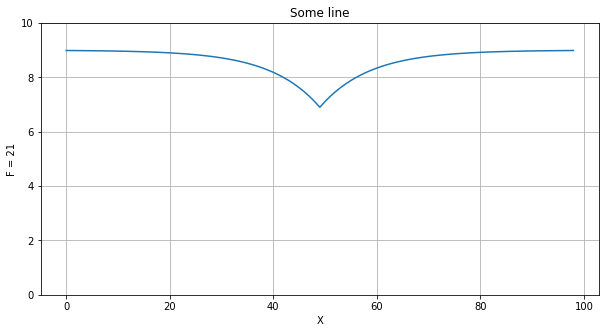

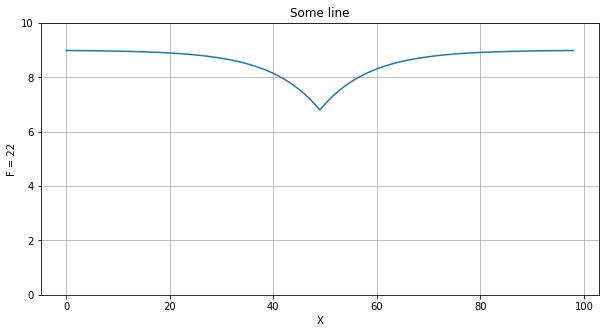

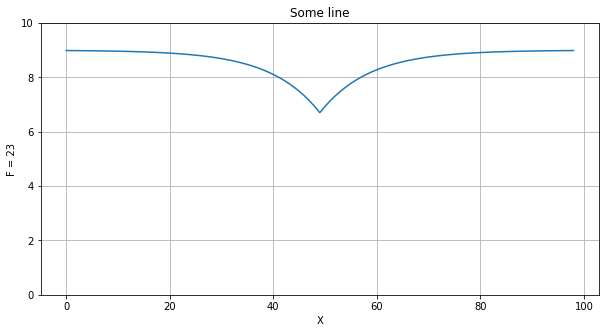

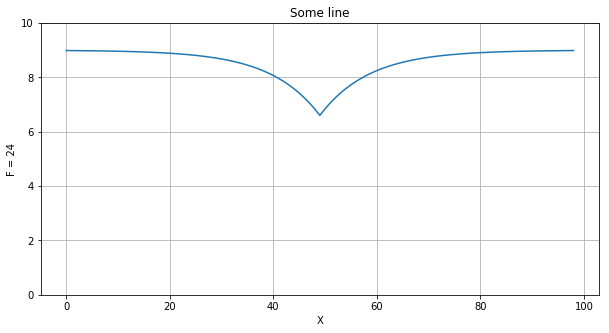

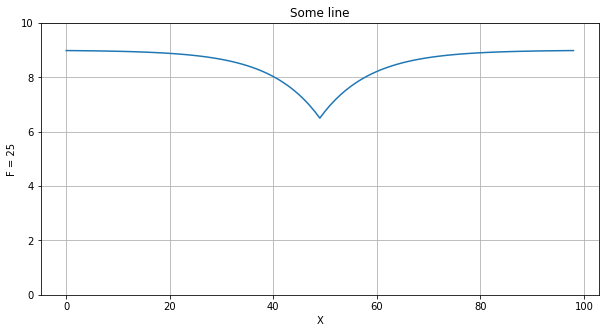

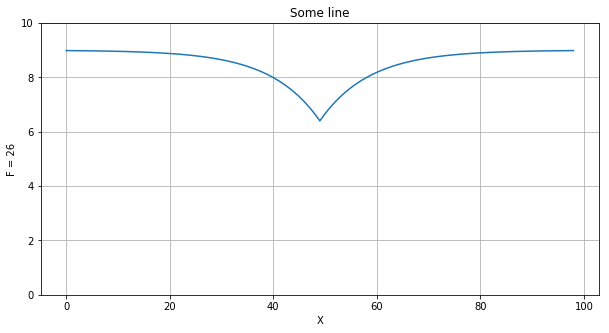

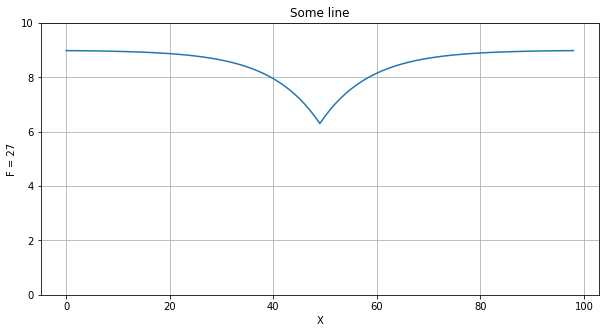

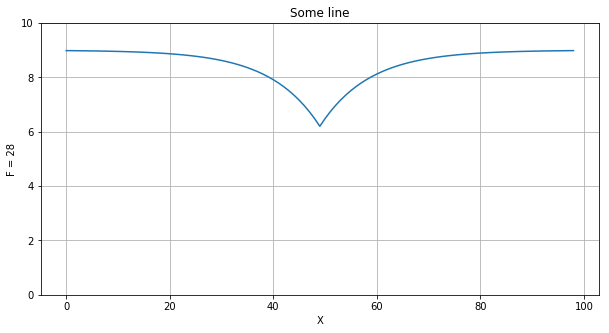

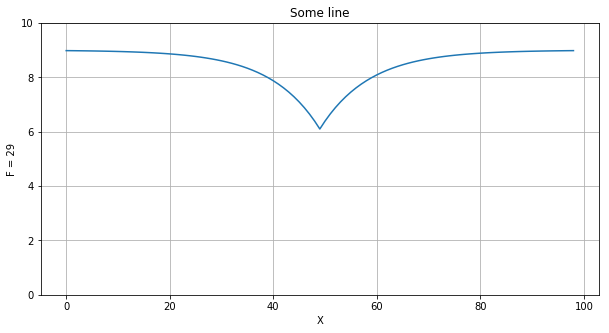

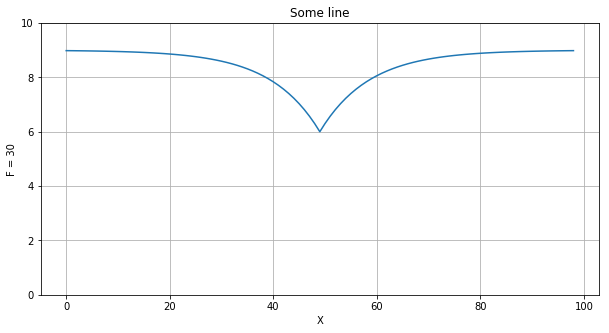

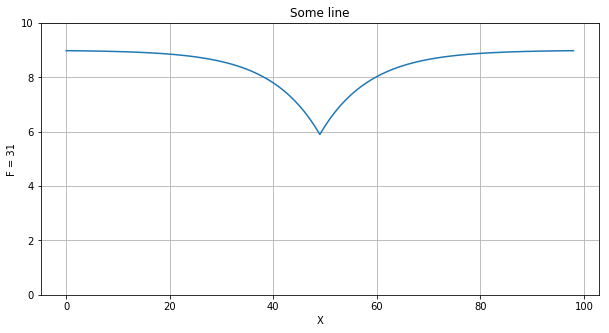

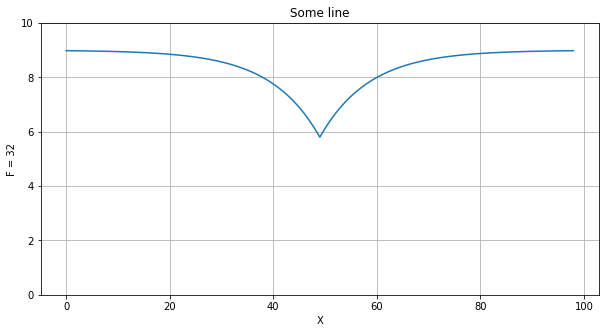

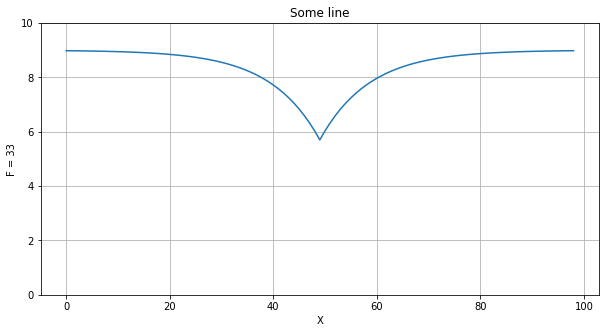

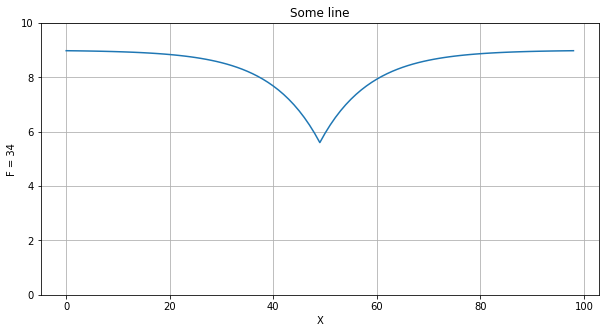

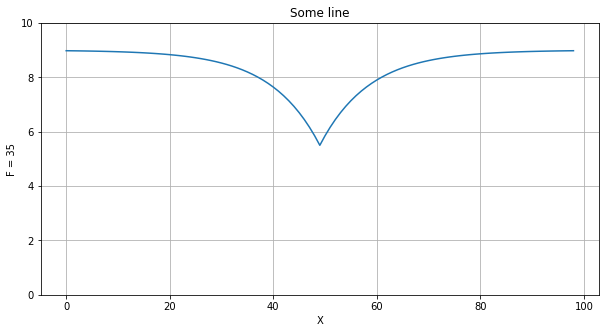

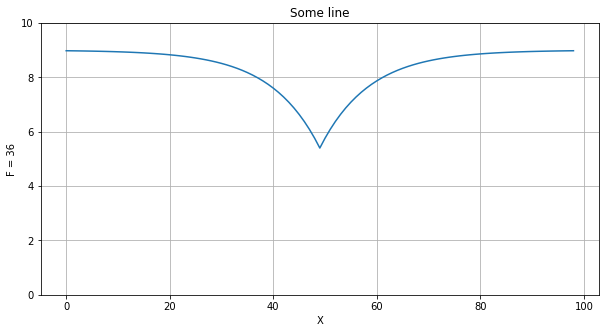

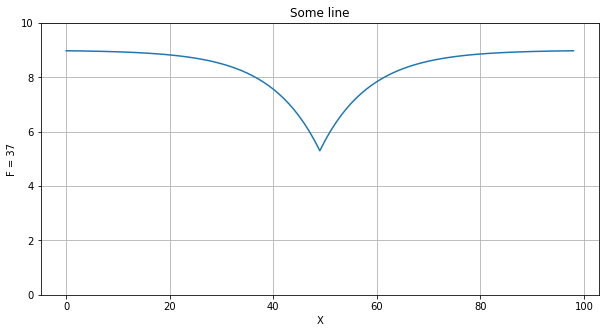

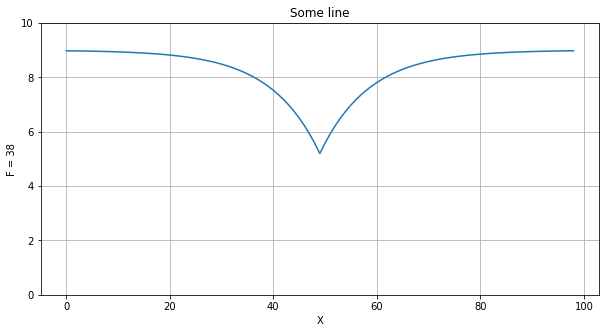

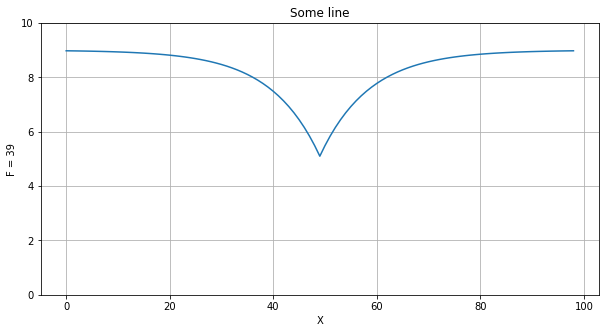

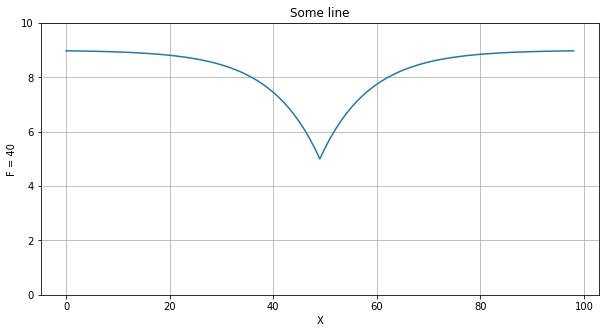

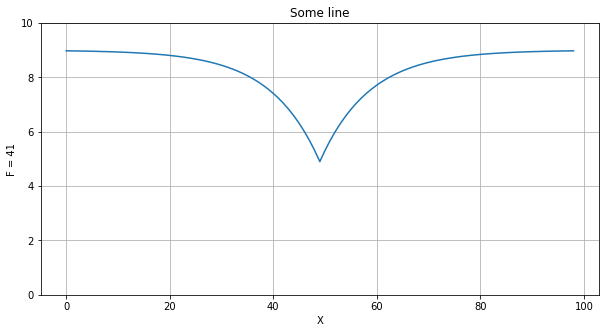

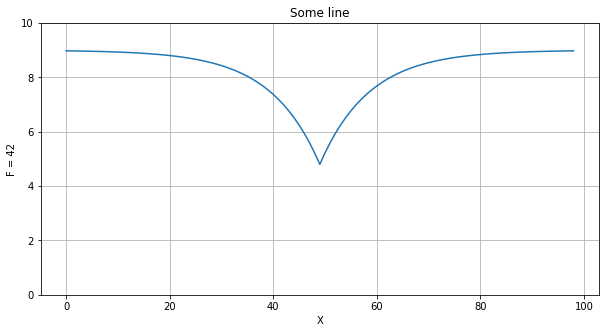

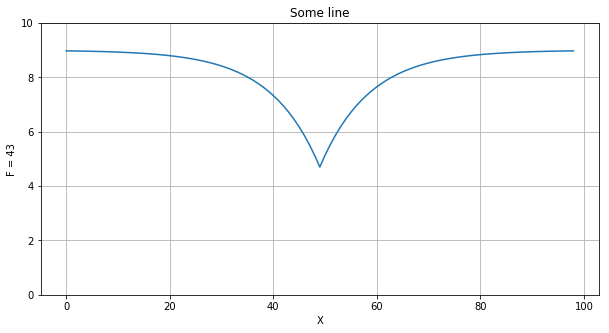

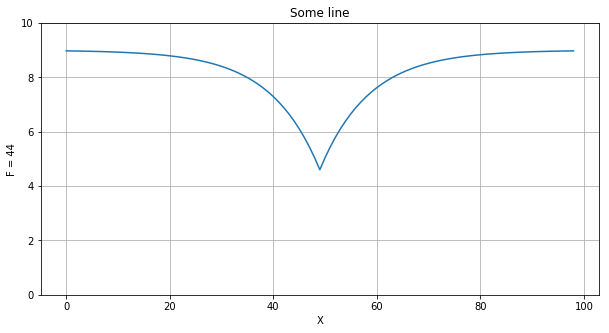

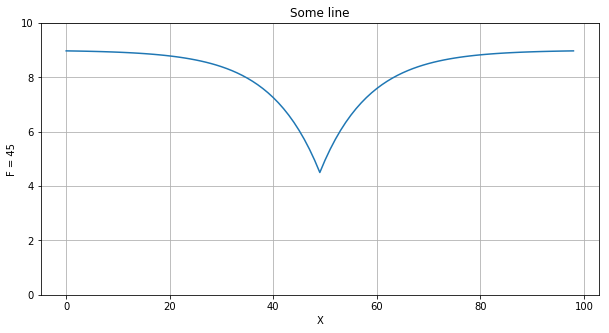

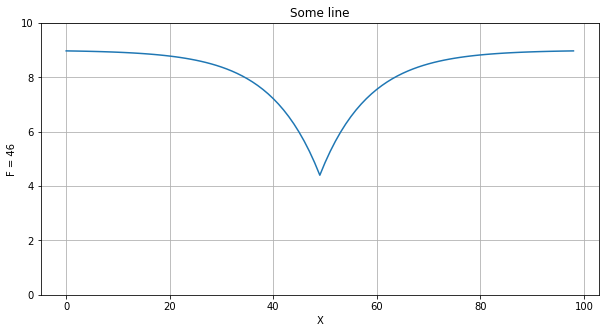

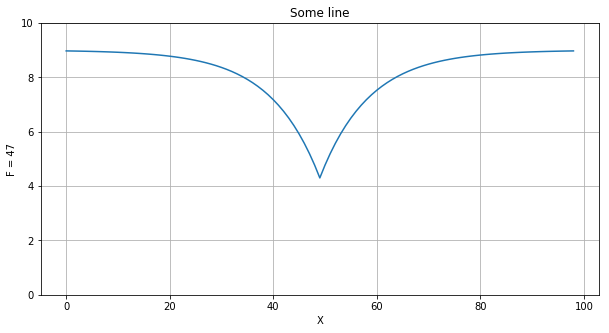

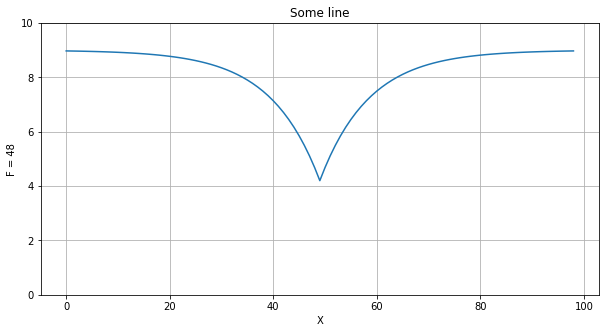

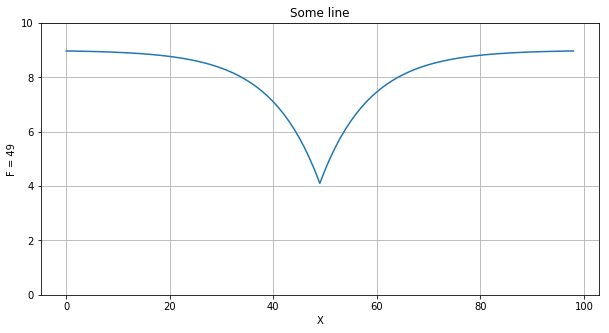

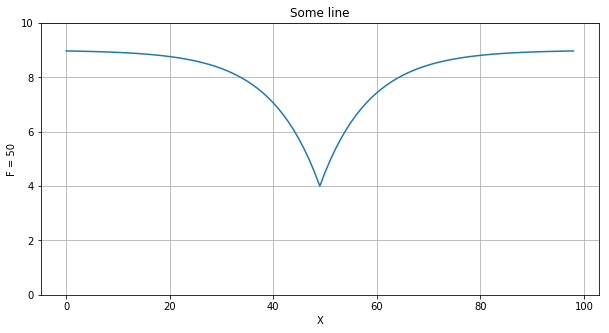

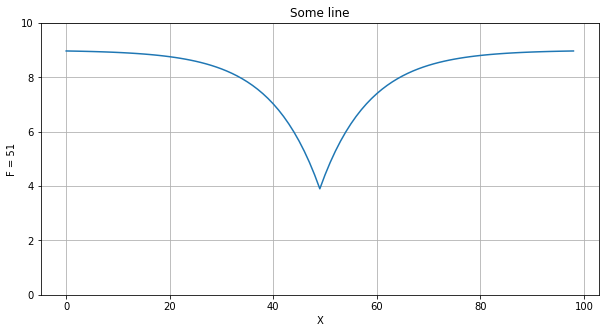

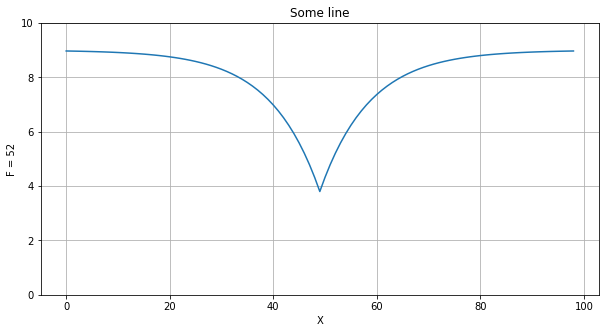

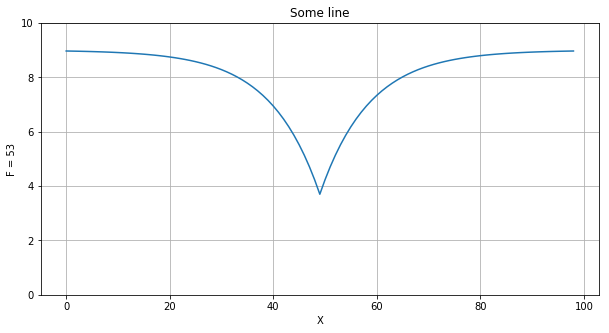

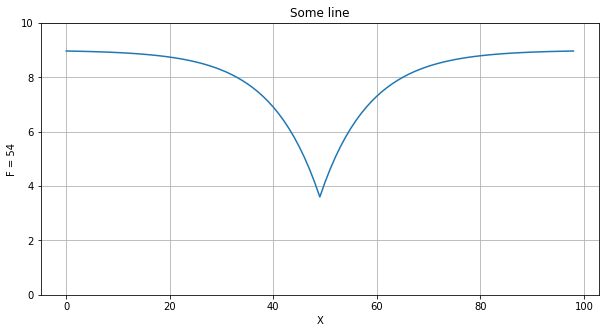

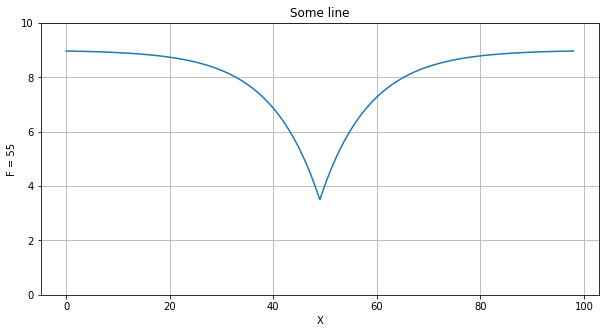

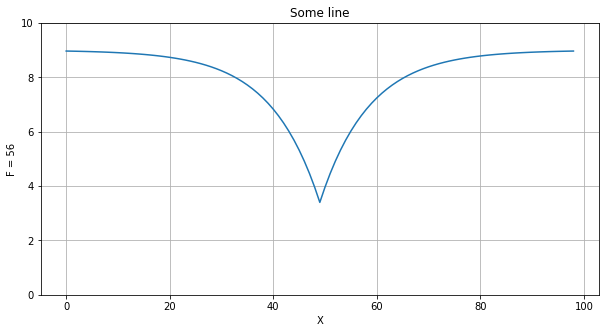

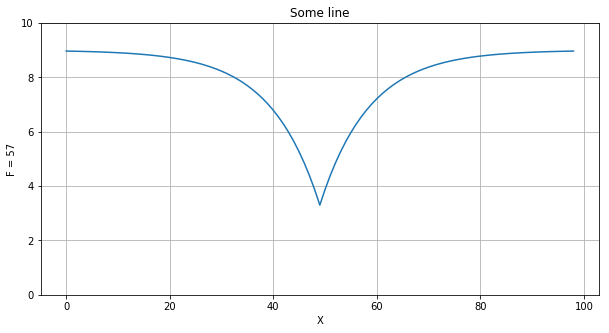

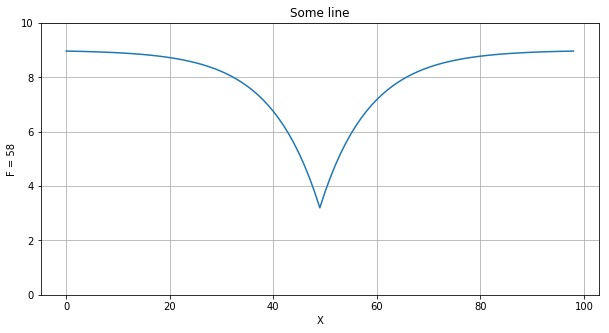

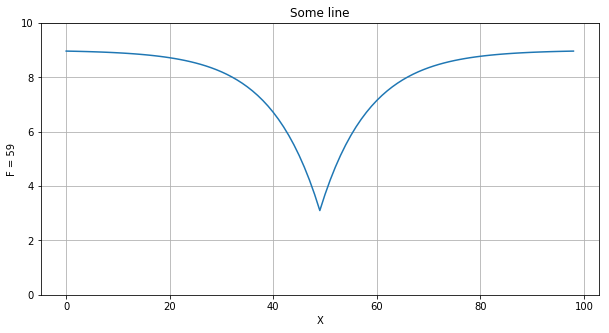

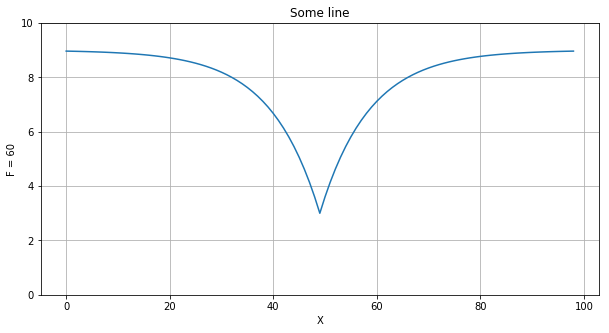

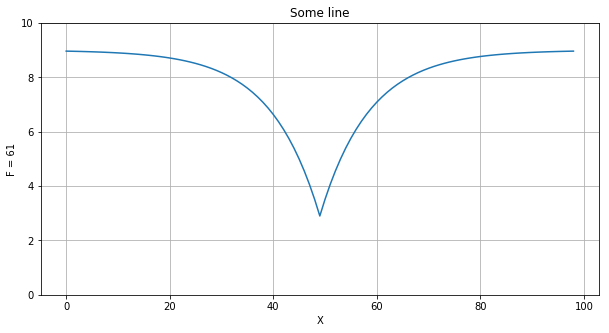

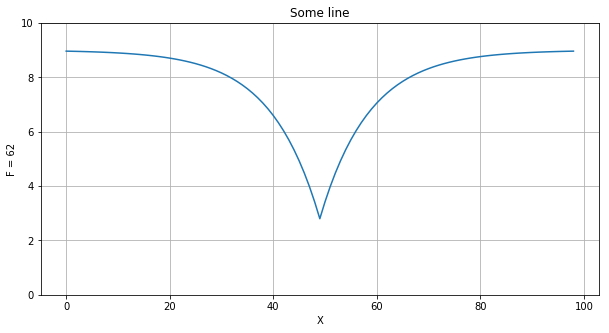

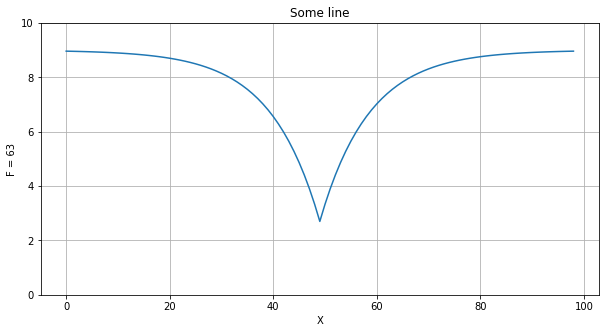

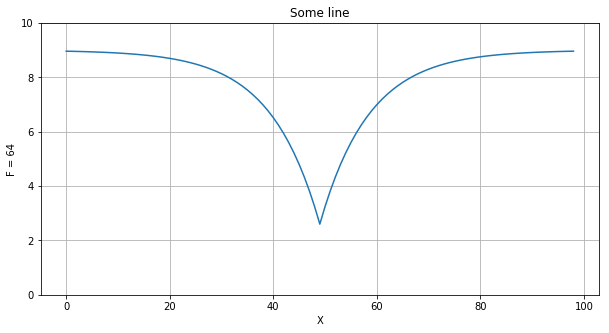

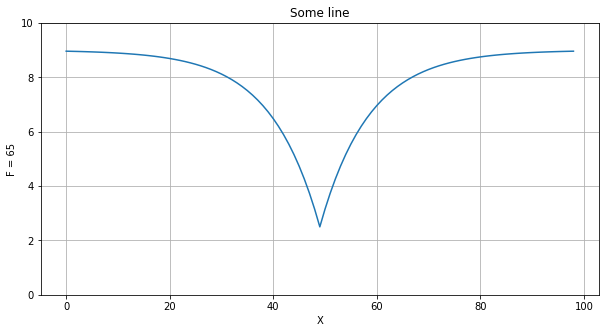

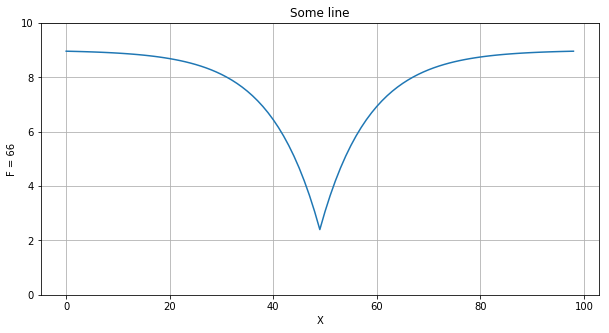

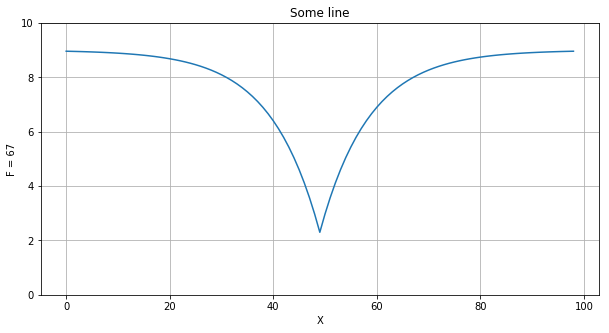

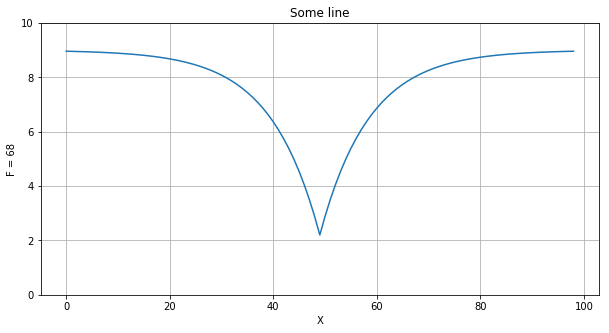

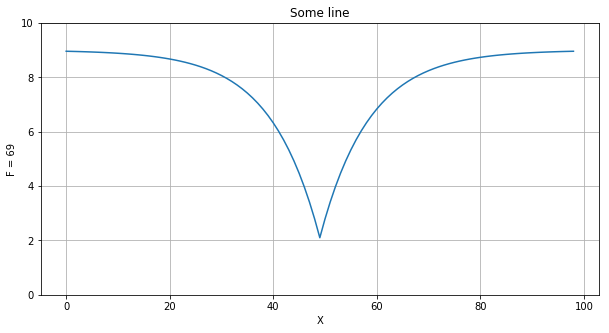

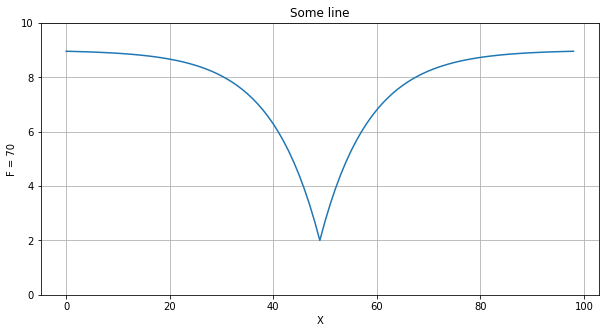

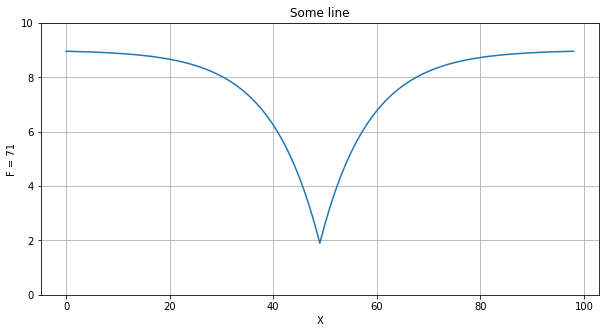

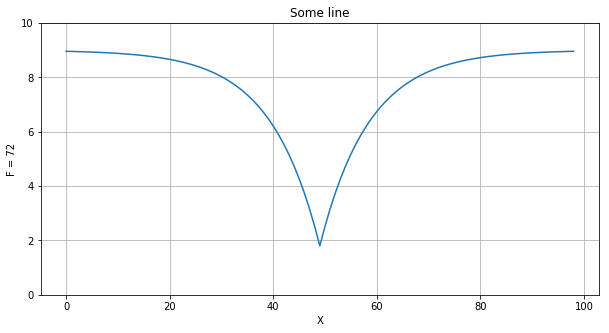

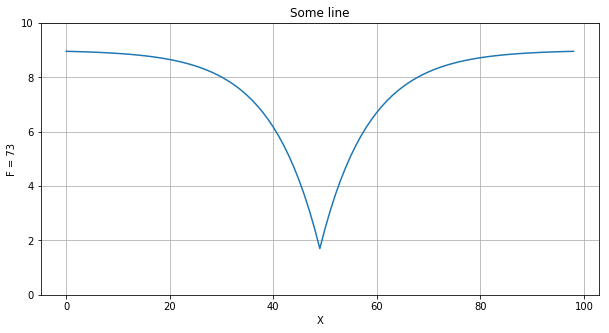

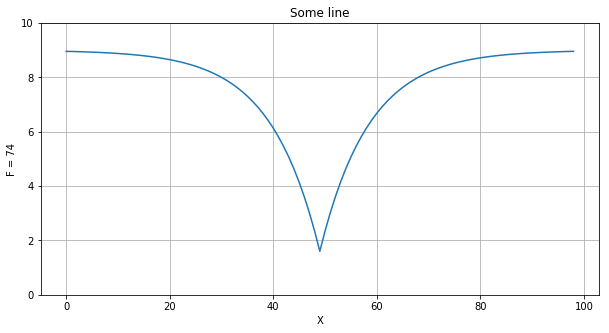

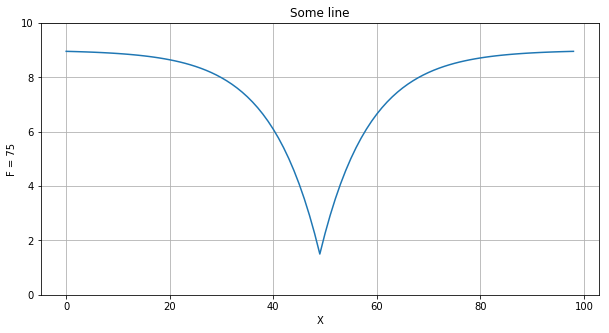

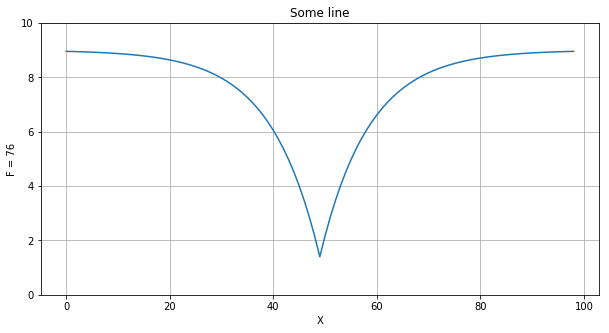

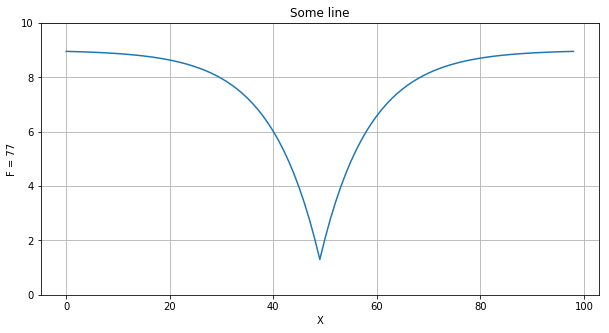

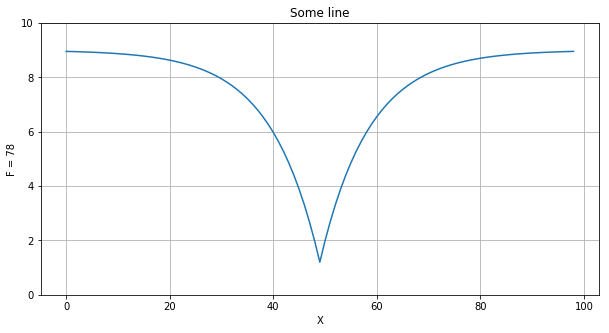

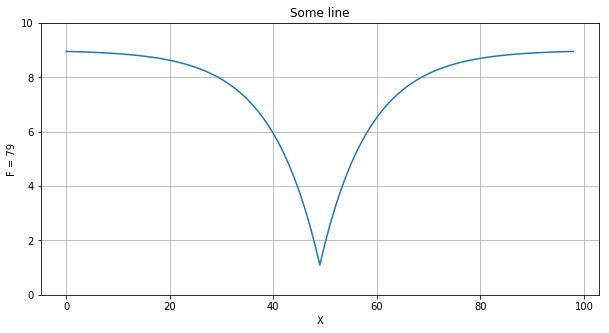

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio

f_point = lambda x: 0.1 * x
len_line = 100
max_y = 10.
start_level = max_y - 1
center = len_line / 2


def get_data_for_plotting(power):
    half_line = np.array([start_level]*center)
    for j in range(center):
        power_local = f_point(power)
        power -= power_local
        half_line[center - j - 1] -= power_local
    points_y = np.concatenate([half_line, half_line[-2::-1]])
    points_x = np.arange(0., len(points_y))
    return points_x, points_y
    

def plot_for_some_f(power):
    x, y = get_data_for_plotting(power)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y)
    ax.grid()
    ax.set(xlabel='X', ylabel='F = {}'.format(power), title='Some line')
    ax.set_ylim(0, max_y)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

imageio.mimsave('./line.gif', [plot_for_some_f(i) for i in range(80)], fps=20)